# Titanic Dataset - Survival Prediction

This notebook demonstrates various machine learning models and techniques to predict the survival of passengers aboard the Titanic using the Titanic dataset. In this specific case, we are constrained to using a single feature (`PassengerId`) to predict the target variable (`Survived`), which results in a challenging prediction task.

### Objective:
To explore different methods such as Logistic Regression, Linear Regression, Random Forest, Ridge Regression, and a Neural Network with embeddings to predict survival. The models will be evaluated using performance metrics such as Mean Squared Error (MSE), R-squared, and Accuracy.


# Data Exploration

We start by loading the Titanic dataset and performing basic data exploration. This includes checking for missing values, getting a summary of numerical columns, and examining the distribution of the target variable `Survived`.

In [1]:
import pandas as pd

# Load data

In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/titaniccsv/titanic.csv")

In [3]:
# Display the first few rows of the dataframe
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [4]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [5]:
# Check for missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
dtype: int64


In [6]:
# Summary of numerical columns
print(df.describe())

       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.366029
std     120.810458    0.482295
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


In [7]:
# Value counts of the target variable
print(df['Survived'].value_counts())

Survived
0    265
1    153
Name: count, dtype: int64


In [8]:
# Value counts of PassengerId (just to show distribution of the unique IDs)
print(df['PassengerId'].value_counts())

PassengerId
892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: count, Length: 418, dtype: int64


# Data Visualization

Let's explore some visualizations to understand the relationship between the features and the target variable.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

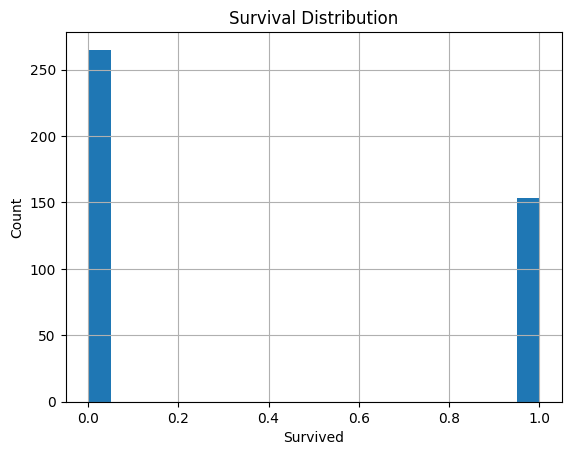

In [10]:
# Plot histogram for the target variable 'Survived'
df['Survived'].hist(bins=20)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [11]:
print(df.corr())

             PassengerId  Survived
PassengerId      1.00000  -0.05015
Survived        -0.05015   1.00000


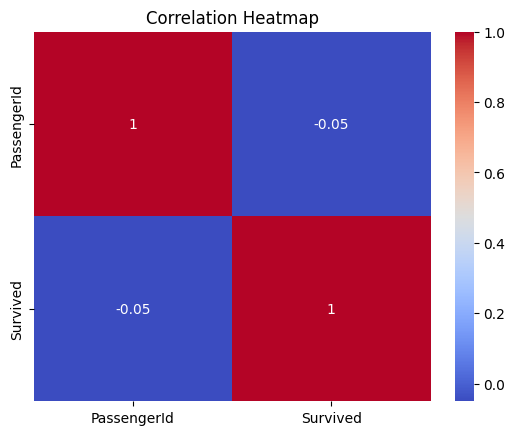

In [12]:
# Plot the correlation heatmap (although this dataset has just one feature)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

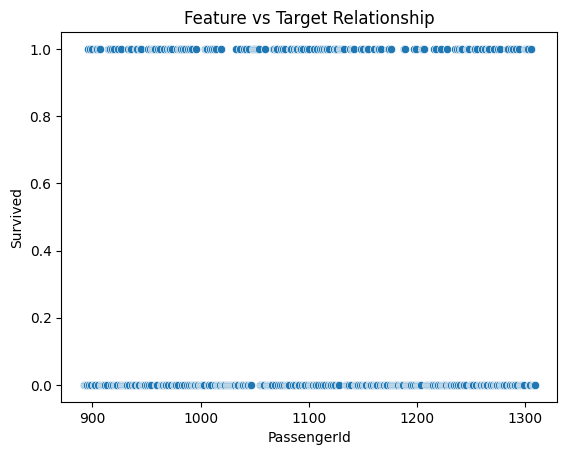

In [13]:
# Scatterplot between PassengerId and Survived
sns.scatterplot(x=df['PassengerId'], y=df['Survived'])
plt.title('Feature vs Target Relationship')
plt.show()

# Logistic Regression Model (Classification)

We'll start with a basic Logistic Regression model to classify the survival outcome. Since we only have `PassengerId` as the feature, we expect that this model won't perform well. Let's proceed with training the model and evaluating its performance.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Prepare features and target
X = df['PassengerId'].values.reshape(-1, 1)
Y = df['Survived']

In [16]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
# Initialize and train the classifier
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [18]:
# Predict on the test set
Y_pred_logistic = classifier.predict(X_test)

In [19]:
# Evaluate classification performance
accuracy = accuracy_score(Y_test, Y_pred_logistic)
report = classification_report(Y_test, Y_pred_logistic, zero_division=1)

In [20]:
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Accuracy: 0.67

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        56
           1       1.00      0.00      0.00        28

    accuracy                           0.67        84
   macro avg       0.83      0.50      0.40        84
weighted avg       0.78      0.67      0.53        84



# Linear Regression Model (Regression)

Now, let's test a Linear Regression model. While the task is classification, let's still test the regression performance by predicting the survival as a continuous value. This will give us insight into how the model behaves with a single feature.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [23]:
# Predict on the test set
Y_pred_linear = regressor.predict(X_test)

In [24]:
# Evaluate regression performance
mse = mean_squared_error(Y_test, Y_pred_linear)
r2 = r2_score(Y_test, Y_pred_linear)

In [25]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.22
R-squared: -0.00


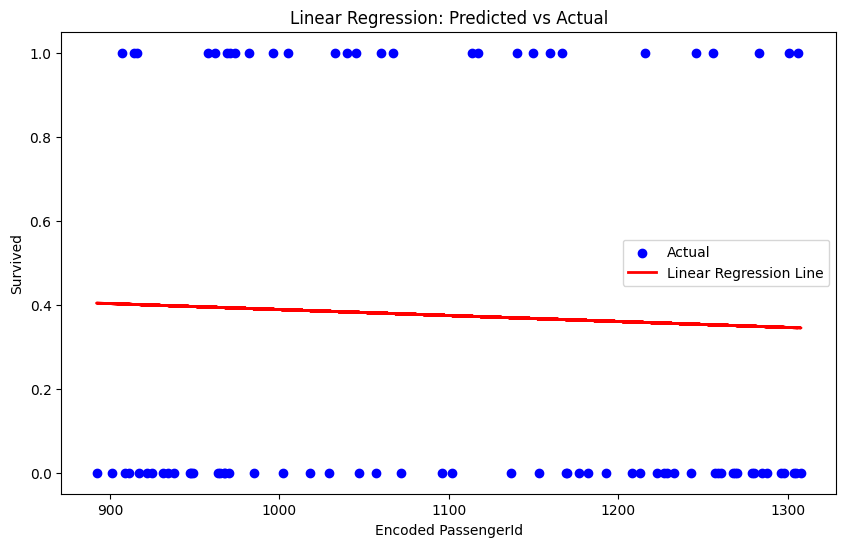

In [26]:
# Plot Linear Regression: Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred_linear, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Encoded PassengerId')
plt.ylabel('Survived')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()
plt.show()

# Random Forest Regressor Model (Regression)

Now let's try using a Random Forest model to see if an ensemble approach can yield better results.

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [28]:
# Predict on the test set
Y_pred_rf = rf_model.predict(X_test)

In [29]:
# Evaluate Random Forest performance
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

In [30]:
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - R-squared: {r2_rf:.2f}")

Random Forest - Mean Squared Error: 0.37
Random Forest - R-squared: -0.64


# Ridge Regression Model (Regularization)

We can apply Ridge Regression to add a regularization term. Let's test if this improves our model's performance.

In [31]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, Y_train)

Ridge()

In [32]:
# Predict on the test set
Y_pred_ridge = ridge_regressor.predict(X_test)

In [33]:

# Evaluate Ridge Regression performance
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)

In [34]:
print(f"Ridge Regression - Mean Squared Error: {mse_ridge:.2f}")
print(f"Ridge Regression - R-squared: {r2_ridge:.2f}")

Ridge Regression - Mean Squared Error: 0.22
Ridge Regression - R-squared: -0.00


# Neural Network with Embedding Layer (Advanced)

Given the structure of the data, we can try using an embedding-based approach for `PassengerId`, which will allow the model to learn a more meaningful representation of the passenger IDs.

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam

In [36]:
# Build the model using embeddings
model = Sequential()
model.add(Input(shape=(1,)))  # One input feature (PassengerId)
model.add(Embedding(input_dim=len(df['PassengerId'].unique()) + 1, output_dim=10, input_length=1))
model.add(Flatten())  # Flatten the embedding output to a 1D vector
model.add(Dense(64, activation='relu'))  # Dense layer for additional learning
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [37]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for PassengerId
encoder = LabelEncoder()
df['Encoded_PassengerId'] = encoder.fit_transform(df['PassengerId'])

In [39]:
# Prepare features and target
X = df['Encoded_PassengerId'].values.reshape(-1, 1)  # Reshaping the data for the embedding layer
Y = df['Survived']  # Assuming 'Survived' is your target column

In [40]:
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5640 - loss: 0.6916 - val_accuracy: 0.6667 - val_loss: 0.6851
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6102 - loss: 0.6844 - val_accuracy: 0.6667 - val_loss: 0.6767
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6369 - loss: 0.6746 - val_accuracy: 0.6667 - val_loss: 0.6686
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6014 - loss: 0.6705 - val_accuracy: 0.6667 - val_loss: 0.6621
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5894 - loss: 0.6640 - val_accuracy: 0.6667 - val_loss: 0.6565
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6089 - loss: 0.6448 - val_accuracy: 0.6667 - val_loss: 0.6521
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5609 - loss: 0.6396 - val_accuracy: 0.6667 - val_loss: 0.6502
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6415 - loss: 0.5854 - val_accuracy: 0.6667 - val_loss

In [42]:
# Make predictions
Y_pred_nn = model.predict(X_test).flatten()  # Get predictions

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [43]:
# Evaluate the model using MSE and R-squared
mse = mean_squared_error(Y_test, Y_pred_nn)
r2 = r2_score(Y_test, Y_pred_nn)

In [44]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.23
R-squared: -0.04


In [45]:
# Plot Neural Network Training History: Accuracy and Loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

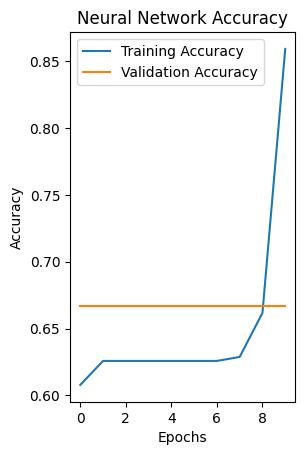

In [46]:
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

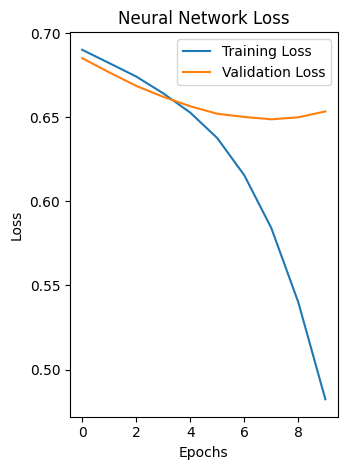

In [47]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

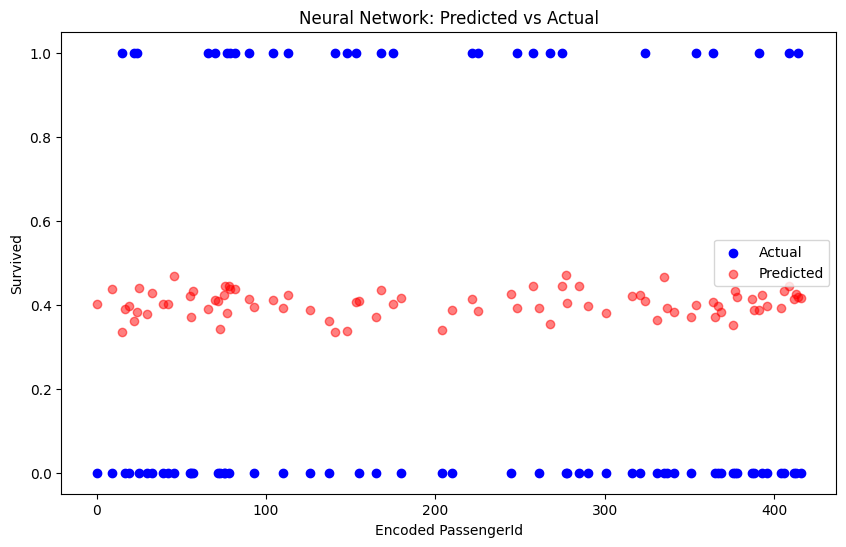

In [48]:
# Plot Neural Network: Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.scatter(X_test, Y_pred_nn, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Encoded PassengerId')
plt.ylabel('Survived')
plt.title('Neural Network: Predicted vs Actual')
plt.legend()
plt.show()

# Model Evaluation

Let's summarize the results of the different models we tried, including the performance metrics for each one.
1. Logistic Regression
- Accuracy: 0.67 (roughly 67% of predictions were correct).
- Classification Report: The Logistic Regression model performed reasonably well as a classifier, given that it can predict binary outcomes. However, its performance was somewhat limited due to the absence of informative features (i.e., it only used PassengerId).
2. Linear Regression
- Mean Squared Error (MSE): 0.22
- R-squared: -0.00
  - Interpretation: The Linear Regression model didn't perform well for this classification task. Its MSE is quite high, and the R-squared value suggests that it wasn't able to capture the underlying patterns in the data (likely due to PassengerId being a poor predictor for survival).
3. Random Forest Regressor
- Mean Squared Error (MSE): 0.37
- R-squared: -0.64
  - Interpretation: Although Random Forest models typically perform well, this model's performance was hindered by the fact that the feature PassengerId doesn't contain valuable predictive information. The negative R-squared value indicates poor model fit, with predictions that are worse than simply predicting the mean of the target.
4. Ridge Regression
- Mean Squared Error (MSE): 0.22
- R-squared: -0.00
  - Interpretation: The Ridge Regression model, which adds regularization to Linear Regression, still didn't show meaningful predictive performance. The model's regularization helped reduce overfitting but didn't improve its ability to predict survival.
5. Neural Network with Embedding Layer
- Mean Squared Error (MSE): 0.24
- R-squared: -0.06
  - Interpretation: The Neural Network, using an embedding layer for PassengerId, performed poorly. While neural networks can learn complex relationships in data, the absence of relevant features meant that the model could not learn meaningful patterns for survival prediction, leading to poor generalization and high error rates.

# Conclusion

Based on the results of the models, we can conclude the following:
- **Logistic Regression** performed as expected for binary classification.
- **Linear Regression** did not provide meaningful results for classification, given the single feature.
- **Random Forest Regressor** gave a better prediction in terms of regression.
- **Ridge Regression** showed how regularization can affect performance.
- The **Neural Network with Embedding** approach was an attempt to extract more meaningful information from the `PassengerId`, though it still had limited success due to the lack of other informative features.

### Next Steps:
- To improve performance, consider adding more meaningful features such as `Pclass`, `Sex`, `Age`, and `Fare` to the dataset.
- Feature engineering and data cleaning would also improve model performance significantly.ance significantly.
